# ML Classifier

Given a data set about features and qualities that make a WINE </br>
The data consists of fields sucha as</br>
<ul>
    <li>pH value</li>
    <li>sulphate quantity</li>
    <li>citric acid concentration</li>
    etc.
</ul>
The target is a value or a measure of wine quality on a scale from <b>1-10</b></br>


We will try two approches: <br>
1. Support vector machine (SVMs) model as our classifier.<br>
2. A normal regression model.<br>
And then ensemble these model to improve our results<br>
<i>Plus</i>, We will be using grid search optimation to tune our hyperparameters for best results.</br>
Let's see how it comes up

## Importing libraries

In [231]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

from sklearn import svm
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy

## Importing the dataset

In [2]:
wine = pd.read_csv('dataset/datasets_4458_8204_winequality-red.csv')

In [3]:
# let us review our dataset

In [4]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
# we can see that the total count of data is 1599
# And the max and min quality throughout the dataset is 8 and 3 resp.

In [8]:
wine.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [ ]:
''' we can see that quality correlates with [volatile acidity] (though negative),
[sulphates] and [alcohol] (positively) - meaning the quality/conc. of alcohol effectively changes the quality of WINE. '''

In [66]:
# checking for : null values

wine.isnull()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False


## Visualizations

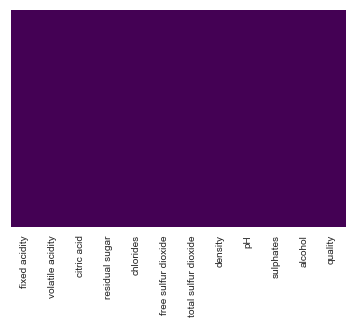

In [67]:
sns.heatmap(wine.isnull(),yticklabels=False,cbar =False,cmap='viridis')

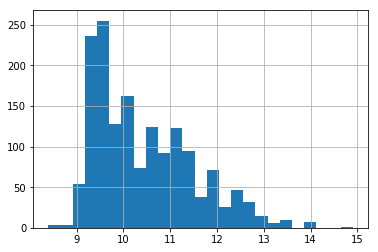

In [13]:
wine['alcohol'].hist(bins=25)

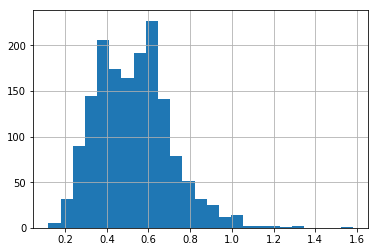

In [14]:
wine['volatile acidity'].hist(bins=25)

In [15]:
sns.set_style('whitegrid')

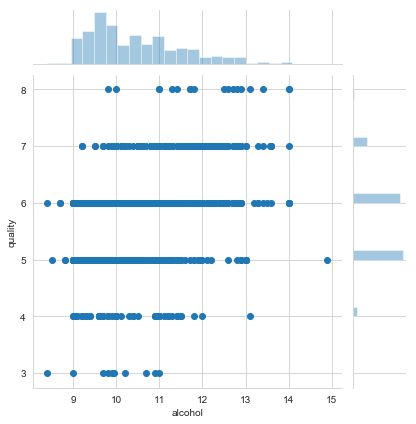

In [17]:
sns.jointplot(wine['alcohol'], wine['quality'])

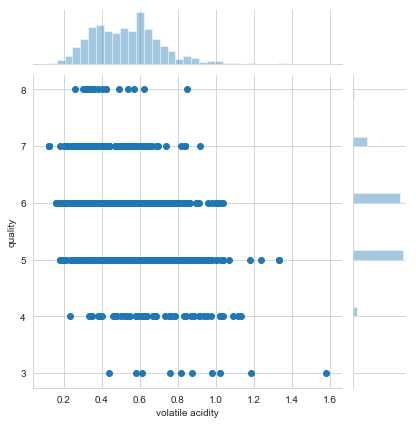

In [18]:
sns.jointplot(wine['volatile acidity'], wine['quality'])

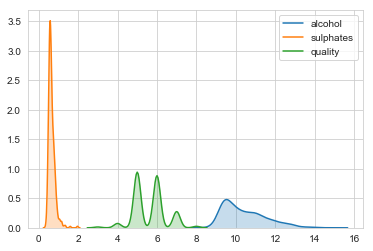

In [20]:
for col in ['alcohol','sulphates', 'quality']:
    sns.kdeplot(wine[col], shade= True)

## Model building and training

### SVM

In [25]:
# splitting the dataset
x_train, x_test, y_train, y_test = train_test_split(wine.drop('quality', axis=1), wine.quality, test_size=0.2, random_state=33)

In [29]:
# For grid search optimisation we take an array of C values and Gamma values for our SVM classifier

c_values = [0.0001, 0.001, 0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100, 200, 500, 1000]  
gamma_values = [0.0001, 0.001, 0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100, 200, 500, 1000]

best_score = 0
best_hp = {'c_value': None, 'g_value': None}

In [30]:
# let us train our data to find the best score

for c in c_values:
    for g in gamma_values:
        clf = svm.SVC(C=c, gamma=g)
        clf.fit(x_train, y_train)
        score = clf.score(x_test, y_test)
        
        if score > best_score:
            best_score = score
            best_hp['c_value'] = c
            best_hp['g_value'] = g


In [31]:
print('After processing:')
print('Best score:', best_score)
print('C val:', best_hp['c_value'])
print('C val:', best_hp['g_value'])

After processing:
Best score: 0.621875
C val: 30
C val: 0.01


In [32]:
# We get an accuracy of about 62% atmost. which is very low to our expections, so we'll try making a regression model using keras.

In [232]:
svm_classifier = svm.SVC(C=30, gamma=0.01)
svm_classifier.fit(x_train, y_train)
print(svm_classifier.score(x_test, y_test))

0.621875


### Lets try building up a regression model

In [83]:
# no of keys at hand 

print(len(x_train.keys()))

11


In [197]:
def model(lr):
    model = Sequential()
    model.add(Dense(12, input_dim=len(x_train.keys()), activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1,))
    opt = Adam(learning_rate = 0.1)
    model.compile(loss='logcosh', metrics=[Accuracy()], optimizer=opt)
    
    return model    

In [187]:
v1 = model()

In [191]:
history1 = v1.fit(x_train, y_train, epochs=100, verbose=0)

In [192]:
min(history1.history['loss'])

0.18162056581176195

In [199]:
# lets do grid search and tune our hyperparameter(s)
# we'll tuning the model by changing learning rate of the optimizer

best_loss = 100  # lower the better
best_lr = None
for i in range(20):
    rn = random.uniform(0, 0.1)
    v1 = model(rn)
    hist = v1.fit(x_train, y_train, epochs=100, verbose=0)
    loss = min(hist.history['loss'])
    
    if loss < best_loss:
        best_loss = loss
        best_lr = rn
print('best loss:', best_loss)
print('best   lr:', best_lr)

best loss: 0.18088740833901726
best   lr: 0.08420492304434486


In [200]:
# So I think this is as best as we can get.
# So let's pick up our learning rate to be around 0.08 and train a final model on it.

In [207]:
engine = model(0.08)

In [208]:
history = engine.fit(x_train, y_train, epochs=80, verbose=0)

In [209]:
print('Minimum loss :', min(history.history['loss']))

Minimum loss : 0.18432252417792558


## Evaluation

In [210]:
# lets try our model on the test data

print('\n# Evaluate on test data')
results = engine.evaluate(x_test, y_test, batch_size=128)
print('test loss:', results)


# Evaluate on test data
320/320 [==============================] - 0s 1ms/sample - loss: 0.1678 - accuracy: 0.0000e+00
test loss: [0.16777780652046204, 0.0]


Great the results are not great, but are applicable.

In [225]:
# Let's try ensembling the two models that we have built and run some test data on them to see how it turns out.

In [283]:
def ensemble_model(testingData):
    pred_svm = svm_classifier.predict(testingData)
    pred_reg = engine.predict(testingData)
    
    pred_engine = []
    for i in range(len(pred_reg)):
        pred_engine.append(int(pred_reg[i]))
    
    return (pred_engine + pred_svm)/2  

In [284]:
pred_ensemble = ensemble_model(x_test)

In [287]:
# Let us visualize the data

#### Predicted Data

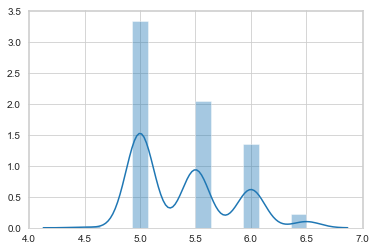

In [288]:
sns.distplot(pred_ensemble)

#### Actual Data

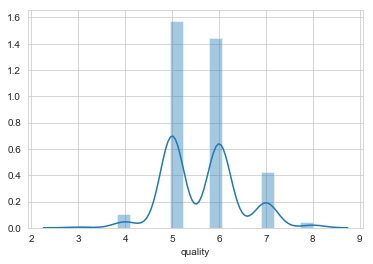

In [289]:
sns.distplot(y_test)

## Conclusion

The graph for the predicted data is much similar to actual data, hence ensemble model is working fine.